<a href="https://colab.research.google.com/github/Kaninika-Datta/Final-Projects/blob/vftvk-Simple-Interest-Calculator/Real_and_fake_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ciplab/real-and-fake-face-detection

100% 431M/431M [00:11<00:00, 43.0MB/s]
100% 431M/431M [00:11<00:00, 38.8MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/real-and-fake-face-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

kaggle.json	    real_and_fake_face_detection      sample_data
real_and_fake_face  real-and-fake-face-detection.zip


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
fake_face= os.listdir('/content/real_and_fake_face_detection/real_and_fake_face/training_fake')
real_face=os.listdir('/content/real_and_fake_face_detection/real_and_fake_face/training_real')
print(fake_face[0:5])
print(real_face[0:5])

['easy_162_0001.jpg', 'mid_318_1111.jpg', 'easy_110_0001.jpg', 'easy_81_1111.jpg', 'hard_193_1111.jpg']
['real_00327.jpg', 'real_00879.jpg', 'real_00900.jpg', 'real_01002.jpg', 'real_00989.jpg']


In [ ]:
print('Number of fake face images:', len(fake_face))
print('Number of real face images:', len(real_face))

Number of fake face images: 960
Number of real face images: 1081


In [ ]:
# create the labels
real_face_labels = [1]*1081
fake_face_labels = [0]*960

In [ ]:
print(real_face_labels[0:5])
print(fake_face_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(real_face_labels))
print(len(fake_face_labels))

1081
960


In [ ]:
labels=real_face_labels+fake_face_labels
print(len(labels))

2041


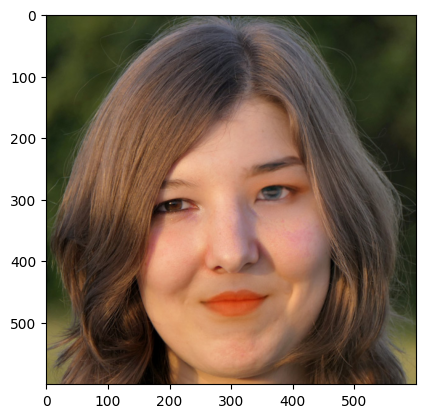

In [ ]:
#fake image
img=mpimg.imread('/content/real_and_fake_face_detection/real_and_fake_face/training_fake/easy_102_0101.jpg')
plt.imshow(img)
plt.show()

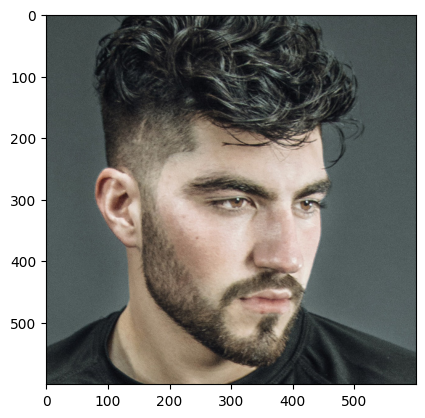

In [ ]:
#real image
img=mpimg.imread('/content/real_and_fake_face_detection/real_and_fake_face/training_real/real_00008.jpg')
plt.imshow(img)
plt.show()

Image Preprocessing

1.Resize the images
2.Convert the images to numpy arrays.

In [ ]:
#real face
real_face_path='/content/real_and_fake_face_detection/real_and_fake_face/training_real/'
data=[]
for img_file in real_face:
  image=Image.open(real_face_path+img_file)
  image=image.resize((224,224))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
#fake face
fake_face_path='/content/real_and_fake_face_detection/real_and_fake_face/training_fake/'

for img_file in fake_face:
  image=Image.open(fake_face_path+img_file)
  image=image.resize((224,224))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

In [ ]:
len(data)

2041

In [ ]:
data[0].shape

(224, 224, 3)

In [ ]:
X=np.array(data)
Y=np.array(labels)

In [ ]:
print(X.shape,Y.shape)

(2041, 224, 224, 3) (2041,)


In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2041, 224, 224, 3) (1632, 224, 224, 3) (409, 224, 224, 3)


In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0].shape

(224, 224, 3)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.applications import MobileNetV2
from keras.applications.vgg16 import VGG16

In [ ]:
num_of_classes = 2

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
46/46 [==============================] - 98s 2s/step - loss: 0.6941 - accuracy: 0.5361 - val_loss: 0.6876 - val_accuracy: 0.5366
Epoch 2/5
46/46 [==============================] - 97s 2s/step - loss: 0.6944 - accuracy: 0.5477 - val_loss: 0.6902 - val_accuracy: 0.5305
Epoch 3/5
46/46 [==============================] - 104s 2s/step - loss: 0.6501 - accuracy: 0.6165 - val_loss: 0.7094 - val_accuracy: 0.5854
Epoch 4/5
46/46 [==============================] - 97s 2s/step - loss: 0.5894 - accuracy: 0.6880 - val_loss: 0.7293 - val_accuracy: 0.5793
Epoch 5/5
46/46 [==============================] - 95s 2s/step - loss: 0.4787 - accuracy: 0.7609 - val_loss: 0.8437 - val_accuracy: 0.5976


In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
accuracy

13/13 [==============================] - 6s 497ms/step - loss: 0.7687 - accuracy: 0.5575


0.5574572086334229

In [ ]:
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(224,224,3))
mnet.trainable=False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model=Sequential([
                  mnet,
                  Flatten(),
                  Dense(128,activation='relu'),
                  #Dense(32,activation='relu'),
                  Dense(2, activation = "sigmoid")
    ])

In [ ]:

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
46/46 [==============================] - 53s 1s/step - loss: 1.6674 - accuracy: 0.5872 - val_loss: 0.7553 - val_accuracy: 0.6890
Epoch 2/5
46/46 [==============================] - 48s 1s/step - loss: 0.4731 - accuracy: 0.8065 - val_loss: 0.8925 - val_accuracy: 0.6585
Epoch 3/5
46/46 [==============================] - 49s 1s/step - loss: 0.1844 - accuracy: 0.9298 - val_loss: 0.9012 - val_accuracy: 0.6646
Epoch 4/5
46/46 [==============================] - 48s 1s/step - loss: 0.0655 - accuracy: 0.9837 - val_loss: 0.9629 - val_accuracy: 0.6402
Epoch 5/5
46/46 [==============================] - 48s 1s/step - loss: 0.0346 - accuracy: 0.9973 - val_loss: 1.0750 - val_accuracy: 0.6402


In [ ]:
loss,accuracy=model.evaluate(X_test,Y_test)
accuracy

13/13 [==============================] - 11s 867ms/step - loss: 1.2263 - accuracy: 0.5844


0.5843520760536194

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is real face')

else:

  print('The person in the image is fake face')